In [14]:
# !pip install graphein
import logging
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("graphein").setLevel(logging.WARNING)

from typing import List, Callable
import networkx as nx
from graphein.rna.graphs import construct_rna_graph
from graphein.rna.edges import (
    add_all_dotbracket_edges,
    add_pseudoknots,
    add_phosphodiester_bonds,
    add_base_pairing_interactions
)

## Graphein RNA Graph Construction Tutorial

In this notebook we construct graphs of RNA secondary structures.

The inputs we require are a sequence (optional) and a [dotbracket](https://www.tbi.univie.ac.at/RNA/ViennaRNA/doc/html/rna_structure_notations.html) specification of the secondary structure. 

The workflow we follow is similar to the other data modalities. The desired edge constructions are passed as a list of functions to the construction function.

### Construction with a dotbracket

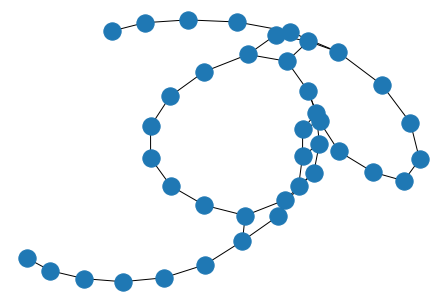

In [15]:
from graphein.rna.visualisation import plot_rna_graph
edge_funcs_1: List[Callable] = [
    add_base_pairing_interactions,
    add_phosphodiester_bonds,
    add_pseudoknots,
]
edge_funcs_2: List[Callable] = [add_all_dotbracket_edges]

g = construct_rna_graph(
    "......((((((......[[[))))))......]]]....",
    sequence=None,
    edge_construction_funcs=edge_funcs_1,
)
nx.draw(g)

## Construction with a dotbracket and sequence

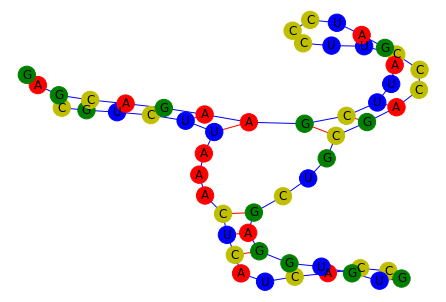

In [16]:
g = construct_rna_graph(
    sequence="CGUCUUAAACUCAUCACCGUGUGGAGCUGCGACCCUUCCCUAGAUUCGAAGACGAG",
    dotbracket="((((((...(((..(((...))))))...(((..((.....))..)))))))))..",
    edge_construction_funcs=edge_funcs_1,
)

plot_rna_graph(g)